<a href="https://colab.research.google.com/github/CS20M038/CS6910-assignment_3/blob/main/Attention_GRU_v1_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Start Creating the Dataset

In [1]:
#@title Import Libraries
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

from scipy.ndimage.interpolation import shift
import csv
import random

In [2]:
#@title Check GPU
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
input_dict=['<start>','<end>']
target_dict=['<start>','<end>']
eng_alphabets = 'abcdefghijklmnopqrstuvwxyz'
pad_char = '- PAD-'
eng_alpha2index = {'<start>': 1,'<end>':2}
for index, alpha in enumerate(eng_alphabets):
    eng_alpha2index[alpha] = index+3
    input_dict.append(alpha)

print(eng_alpha2index)
print(input_dict)
# Hindi Unicode Hex Range is 2304:2432. Source: https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_alpha2index = {'<start>': 1,'<end>': 2}
#hindi_alpha2index = {'<start>': 0}
for index, alpha in enumerate(hindi_alphabets):
    hindi_alpha2index[alpha] = index+3
    target_dict.append(alpha)
    #print(alpha)

print(hindi_alpha2index)
print(target_dict)



{'<start>': 1, '<end>': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'q': 19, 'r': 20, 's': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28}
['<start>', '<end>', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'<start>': 1, '<end>': 2, 'ऀ': 3, 'ँ': 4, 'ं': 5, 'ः': 6, 'ऄ': 7, 'अ': 8, 'आ': 9, 'इ': 10, 'ई': 11, 'उ': 12, 'ऊ': 13, 'ऋ': 14, 'ऌ': 15, 'ऍ': 16, 'ऎ': 17, 'ए': 18, 'ऐ': 19, 'ऑ': 20, 'ऒ': 21, 'ओ': 22, 'औ': 23, 'क': 24, 'ख': 25, 'ग': 26, 'घ': 27, 'ङ': 28, 'च': 29, 'छ': 30, 'ज': 31, 'झ': 32, 'ञ': 33, 'ट': 34, 'ठ': 35, 'ड': 36, 'ढ': 37, 'ण': 38, 'त': 39, 'थ': 40, 'द': 41, 'ध': 42, 'न': 43, 'ऩ': 44, 'प': 45, 'फ': 46, 'ब': 47, 'भ': 48, 'म': 49, 'य': 50, 'र': 51, 'ऱ': 52, 'ल': 53, 'ळ': 54, 'ऴ': 55, 'व': 56, 'श': 57, 'ष': 58, 'स': 59, 'ह': 60, 'ऺ': 61, 'ऻ': 62, '़': 63, 'ऽ': 64, 'ा': 65, 'ि': 66,

In [4]:
# Hindi Unicode Hex Range is 2304:2432. Source: https://en.wikipedia.org/wiki/Devanagari_(Unicode_block)

hindi_alphabets = [chr(alpha) for alpha in range(2304, 2432)]
hindi_alphabet_size = len(hindi_alphabets)

hindi_index2alpha = {1:'<start>',2: '<end>'}
for index, alpha in enumerate(hindi_alphabets):
    hindi_index2alpha[index+3] = alpha
   # target_dict.append(alpha)
    #print(alpha)

print(hindi_index2alpha)

eng_alphabets = 'abcdefghijklmnopqrstuvwxyz'
eng_index2alpha = {1:'<start>',2: '<end>'}
for index, alpha in enumerate(eng_alphabets):
    eng_index2alpha[index+3] = alpha
   # target_dict.append(alpha)
    #print(alpha)

print(eng_index2alpha)

{1: '<start>', 2: '<end>', 3: 'ऀ', 4: 'ँ', 5: 'ं', 6: 'ः', 7: 'ऄ', 8: 'अ', 9: 'आ', 10: 'इ', 11: 'ई', 12: 'उ', 13: 'ऊ', 14: 'ऋ', 15: 'ऌ', 16: 'ऍ', 17: 'ऎ', 18: 'ए', 19: 'ऐ', 20: 'ऑ', 21: 'ऒ', 22: 'ओ', 23: 'औ', 24: 'क', 25: 'ख', 26: 'ग', 27: 'घ', 28: 'ङ', 29: 'च', 30: 'छ', 31: 'ज', 32: 'झ', 33: 'ञ', 34: 'ट', 35: 'ठ', 36: 'ड', 37: 'ढ', 38: 'ण', 39: 'त', 40: 'थ', 41: 'द', 42: 'ध', 43: 'न', 44: 'ऩ', 45: 'प', 46: 'फ', 47: 'ब', 48: 'भ', 49: 'म', 50: 'य', 51: 'र', 52: 'ऱ', 53: 'ल', 54: 'ळ', 55: 'ऴ', 56: 'व', 57: 'श', 58: 'ष', 59: 'स', 60: 'ह', 61: 'ऺ', 62: 'ऻ', 63: '़', 64: 'ऽ', 65: 'ा', 66: 'ि', 67: 'ी', 68: 'ु', 69: 'ू', 70: 'ृ', 71: 'ॄ', 72: 'ॅ', 73: 'ॆ', 74: 'े', 75: 'ै', 76: 'ॉ', 77: 'ॊ', 78: 'ो', 79: 'ौ', 80: '्', 81: 'ॎ', 82: 'ॏ', 83: 'ॐ', 84: '॑', 85: '॒', 86: '॓', 87: '॔', 88: 'ॕ', 89: 'ॖ', 90: 'ॗ', 91: 'क़', 92: 'ख़', 93: 'ग़', 94: 'ज़', 95: 'ड़', 96: 'ढ़', 97: 'फ़', 98: 'य़', 99: 'ॠ', 100: 'ॡ', 101: 'ॢ', 102: 'ॣ', 103: '।', 104: '॥', 105: '०', 106: '१', 107: '२', 108: '३', 109: '४', 110: '५

In [5]:
def readXmlDataset(filename):
        tsv_file = open(filename)
        read_tsv = csv.reader(tsv_file, delimiter="\t")
        lang1_words = []
        lang2_words = []

        for row in read_tsv:
            lang2_words.append(row[0])
            lang1_words.append(row[1])
            #print(row[0])

        return lang1_words, lang2_words
train_input_texts, train_target_texts = readXmlDataset('hi.translit.sampled.train.tsv')
test_input_texts, test_target_texts = readXmlDataset('hi.translit.sampled.test.tsv')
val_input_texts, val_target_texts = readXmlDataset('hi.translit.sampled.dev.tsv')

In [6]:
train_target_texts[0]

'अं'

In [7]:
def word_rep(word, letter2index, device = 'cpu'):
    rep = np.zeros((len(word)+1,  129))
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        rep[letter_index][pos] = 1
    pad_pos = letter2index[pad_char]
    rep[letter_index+1][pad_pos] = 1
    return rep

def gt_rep(word, letter2index, device = 'cpu'):
    gt_rep = np.zeros([len(word)+2], dtype=np.long)
    gt_rep[0]=1
    for letter_index, letter in enumerate(word):
        pos = letter2index[letter]
        gt_rep[letter_index+1] = pos
    gt_rep[letter_index+2]= letter2index['<end>']
    return gt_rep
    word_rep('abc',eng_alpha2index).shape
    x=gt_rep('abc',eng_alpha2index)

In [8]:
gt_rep('अं',hindi_alpha2index)

array([1, 8, 5, 2])

In [9]:
def createDataset(dataset,letter2index):
    X_train=[]
    for i,data in enumerate(dataset):
        #print(data)
        X_train.append(gt_rep(data,letter2index))
    X_train = np.array(X_train)
    return X_train

In [10]:
X_train = createDataset(train_input_texts,eng_alpha2index)
y_train = createDataset(train_target_texts,hindi_alpha2index)
X_test = createDataset(test_input_texts,eng_alpha2index)
y_test = createDataset(test_target_texts,hindi_alpha2index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [11]:
X_train

array([array([ 1,  3, 16,  2]),
       array([ 1,  3, 16, 13,  9,  3, 16, 11, 22,  2]),
       array([ 1, 23, 16,  5, 14,  7,  2]), ...,
       array([ 1, 10, 27,  7, 16, 21,  3, 16,  9,  2]),
       array([ 1, 26, 23,  3, 16, 28,  3, 16,  9,  2]),
       array([ 1, 17, 15,  2])], dtype=object)

In [ ]:
def one_hot_decode(encoded_seq):
	return [argmax(vector) for vector in encoded_seq]
'''d=one_hot_decode(y_train_padded[5])
c=hindi_index2alpha[6]+hindi_index2alpha[3]+hindi_index2alpha[22]+hindi_index2alpha[66]+hindi_index2alpha[49]+hindi_index2alpha[64]+hindi_index2alpha[37]+hindi_index2alpha[0]
c'''

'd=one_hot_decode(y_train_padded[5])\nc=hindi_index2alpha[6]+hindi_index2alpha[3]+hindi_index2alpha[22]+hindi_index2alpha[66]+hindi_index2alpha[49]+hindi_index2alpha[64]+hindi_index2alpha[37]+hindi_index2alpha[0]\nc'

In [13]:
max_input_sequence= max(len(seq) for seq in X_train)
max_output_sequence= max(len(seq) for seq in y_train)

print('max_input_sequence: ', max_input_sequence)
print('max_output_sequence: ', max_output_sequence)

max_input_sequence:  22
max_output_sequence:  21


In [14]:
from keras.preprocessing.sequence import pad_sequences
X_train_padded = pad_sequences(X_train, maxlen= max_input_sequence, padding='post', value=0)
print("X_train shape: ",X_train.shape)
print("X_train_padded shape: ",X_train_padded.shape)

y_train_padded = pad_sequences(y_train, maxlen= max_output_sequence, padding='post', value=0)
print("y_train shape: ",y_train.shape)
print("y_train_padded shape: ",y_train_padded.shape)

X_train shape:  (44204,)
X_train_padded shape:  (44204, 22)
y_train shape:  (44204,)
y_train_padded shape:  (44204, 21)


In [15]:
X_test_padded = pad_sequences(X_test, maxlen= max_input_sequence, padding='post', 
                              value=0)
print("X_test shape: ",X_test.shape)
print("X_test_padded shape: ",X_test_padded.shape)

y_test_padded = pad_sequences(y_test, maxlen= max_output_sequence, padding='post', 
                              value=0)
print("y_test shape: ",y_test.shape)
print("y_test_padded shape: ",y_test_padded.shape)

X_test shape:  (4502,)
X_test_padded shape:  (4502, 22)
y_test shape:  (4502,)
y_test_padded shape:  (4502, 21)


In [17]:
!pip3 install sklearn
from sklearn.model_selection import train_test_split
input_tensor, target_tensor = X_train_padded, y_train_padded
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.001)

In [18]:
# Calculate max_length of the target tensors
max_length_targ, max_length_inp = target_tensor.shape[1], input_tensor.shape[1]

In [19]:
max_length_targ

21

In [20]:
target_tensor_train[0]

array([ 1, 56, 80, 50, 24, 80, 39, 66, 39, 80, 56, 78,  5,  2,  0,  0,  0,
        0,  0,  0,  0], dtype=int32)

In [21]:
# Show the mapping b/w word index and language tokenizer
def convert(lang, tensor):
  for t in tensor:
    if t != 0:
      print ("%d ----> %s" % (t, lang[t]))
      
print ("Input Language; index to word mapping")
convert(eng_index2alpha, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(hindi_index2alpha, target_tensor_train[0])

Input Language; index to word mapping
1 ----> <start>
24 ----> v
27 ----> y
3 ----> a
13 ----> k
22 ----> t
11 ----> i
22 ----> t
24 ----> v
17 ----> o
16 ----> n
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
56 ----> व
80 ----> ्
50 ----> य
24 ----> क
80 ----> ्
39 ----> त
66 ----> ि
39 ----> त
80 ----> ्
56 ----> व
78 ----> ो
5 ----> ं
2 ----> <end>


In [22]:
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

44159 44159 45 45


#End creating data set

In [23]:
# Essential model parameters
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 256
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(eng_alpha2index) + 1
vocab_tar_size = len(hindi_alpha2index) + 1

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [25]:
# Size of input and target batches
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([256, 22]), TensorShape([256, 21]))

In [26]:
# Encoder class
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units

    # Embed the vocab to a dense embedding 
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

    # GRU Layer
    # glorot_uniform: Initializer for the recurrent_kernel weights matrix, 
    # used for the linear transformation of the recurrent state
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  # Encoder network comprises an Embedding layer followed by a GRU layer
  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state=hidden)
    return output, state

  # To initialize the hidden state
  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [27]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)

print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (256, 22, 1024)
Encoder Hidden state shape: (batch size, units) (256, 1024)


In [28]:
# Attention Mechanism
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # values shape == (batch_size, max_len, hidden size)

    # we are doing this to broadcast addition along the time axis to calculate the score
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [29]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (256, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (256, 22, 1)


In [30]:
# Decoder class
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # Used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # x shape == (batch_size, 1)
    # hidden shape == (batch_size, max_length)
    # enc_output shape == (batch_size, max_length, hidden_size)

    # context_vector shape == (batch_size, hidden_size)
    # attention_weights shape == (batch_size, max_length, 1)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [31]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (256, 131)


In [33]:
import os

checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [36]:
import numpy as np

# Evaluate function -- similar to the training loop
def evaluate(sentence):

  # Attention plot (to be plotted later on) -- initialized with max_lengths of both target and input
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  '''# Preprocess the sentence given
  sentence = preprocess_sentence(sentence)

  # Fetch the indices concerning the words in the sentence and pad the sequence
  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]'''
  inputs = gt_rep(sentence,eng_alpha2index)

  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  # Convert the inputs to tensors
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([0], 0)

  # Loop until the max_length is reached for the target lang (ENGLISH)
  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # Store the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    # Get the prediction with the maximum attention
    predicted_id = tf.argmax(predictions[0]).numpy()

    # If <end> token is reached, return the result, input, and attention plot
    if hindi_index2alpha[predicted_id] == '<end>':
      return result, sentence, attention_plot
    # Append the token to the result
    result += hindi_index2alpha[predicted_id]

   

    # The predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [37]:
from matplotlib.font_manager import FontProperties
from pathlib import Path
nirm = Path('/content/Nirmala.ttf')
# configure the Hindi font
hindi_font = FontProperties(fname=nirm)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.font_manager import FontProperties


hindi_font = FontProperties(fname='Mangal 400.TTF', size=18)


In [38]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
  for label in  ax.get_yticklabels():
    label.set_fontproperties(hindi_font)
    label.set_fontsize(15) 

  plt.show()

In [52]:
# Translate function (which internally calls the evaluate function)
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  #print('Input: %s' % (sentence))
  #print('Predicted translation: {}'.format(result))

  #attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
 # plot_attention(attention_plot, sentence.split(' '), result.split(' '))
  return result

In [40]:
def split(word):
    return list(word)
# Translate function (which internally calls the evaluate function)
def translate2(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result), :len(sentence)]
  plot_attention(attention_plot, split(sentence), split(result))
  #return result

In [58]:
def calculate_Sample_Word_accuracy(val_input,val_target,sample_size):
  randomlist = random.sample(range(0, len(val_input)), sample_size)
  # print(randomlist)
  count=0
  start = time.time()
  for i in randomlist:
      result = translate(val_input[i])
      #print("Actual translation",val_target[i])
      if(result==val_target[i]):
          count+=1
  #print('Val Accuracy = : {}'.format(count*100.0/len(randomlist)))
  #print('Time taken for calculating word accuracy {} sec\n'.format(time.time() - start))
  #print("\n")
  #print("\n")
  return count*100.0/len(randomlist)

In [59]:
# Initialize optimizer and loss functions
optimizer = tf.keras.optimizers.Adam()

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

# Loss function
def loss_function(real, pred):

  # Take care of the padding. Not all sequences are of equal length.
  # If there's a '0' in the sequence, the loss is being nullified
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [60]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  # tf.GradientTape() -- record operations for automatic differentiation
  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    # dec_hidden is used by attention, hence is the same enc_hidden
    dec_hidden = enc_hidden

    # <start> token is the initial decoder input
    dec_input = tf.expand_dims([0] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):

      # Pass enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      # Compute the loss
      loss += loss_function(targ[:, t], predictions)

      # Use teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  # As this function is called per batch, compute the batch_loss
  batch_loss = (loss / int(targ.shape[1]))

  # Get the model's variables
  variables = encoder.trainable_variables + decoder.trainable_variables

  # Compute the gradients
  gradients = tape.gradient(loss, variables)

  # Update the variables of the model/network
  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [61]:
import time

EPOCHS = 10

# Training loop
for epoch in range(EPOCHS):
  start = time.time()

  # Initialize the hidden state
  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  # Loop through the dataset
  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):

    # Call the train method
    batch_loss = train_step(inp, targ, enc_hidden)

    # Compute the loss (per batch)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # Save (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  # Output the loss observed until that epoch
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  train_accuracy = calculate_Sample_Word_accuracy(train_input_texts,train_target_texts,250)
  val_accuracy = calculate_Sample_Word_accuracy(val_input_texts,val_target_texts,250)
  print('Epoch {} Train_Word_Accuracy {:.4f}'.format(epoch + 1,
                                      train_accuracy))
  print('Epoch {} Validation_Word_Accuracy {:.4f}'.format(epoch + 1,
                                      val_accuracy))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))


Epoch 1 Batch 0 Loss 0.1086
Epoch 1 Batch 100 Loss 0.0846
Epoch 1 Loss 0.1028
Epoch 1 Train_Word_Accuracy 54.0000
Epoch 1 Validation_Word_Accuracy 36.4000
Time taken for 1 epoch 109.37009954452515 sec

Epoch 2 Batch 0 Loss 0.0867
Epoch 2 Batch 100 Loss 0.0924
Epoch 2 Loss 0.0867
Epoch 2 Train_Word_Accuracy 55.6000
Epoch 2 Validation_Word_Accuracy 41.6000
Time taken for 1 epoch 89.35020780563354 sec

Epoch 3 Batch 0 Loss 0.0976
Epoch 3 Batch 100 Loss 0.0762
Epoch 3 Loss 0.0774
Epoch 3 Train_Word_Accuracy 56.0000
Epoch 3 Validation_Word_Accuracy 40.0000
Time taken for 1 epoch 89.15231680870056 sec

Epoch 4 Batch 0 Loss 0.0802
Epoch 4 Batch 100 Loss 0.0826
Epoch 4 Loss 0.0806
Epoch 4 Train_Word_Accuracy 61.6000
Epoch 4 Validation_Word_Accuracy 43.6000
Time taken for 1 epoch 89.09524512290955 sec

Epoch 5 Batch 0 Loss 0.0705
Epoch 5 Batch 100 Loss 0.0532
Epoch 5 Loss 0.0638
Epoch 5 Train_Word_Accuracy 62.4000
Epoch 5 Validation_Word_Accuracy 39.2000
Time taken for 1 epoch 89.28132629394531

In [62]:
# Restore the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Input: ram
Predicted translation: राम


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


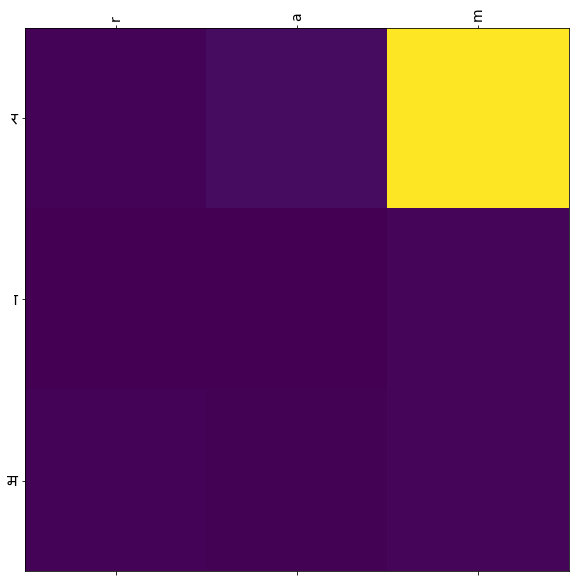

In [65]:
translate2("ram")

Input: saurabh
Predicted translation: सौराभ


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


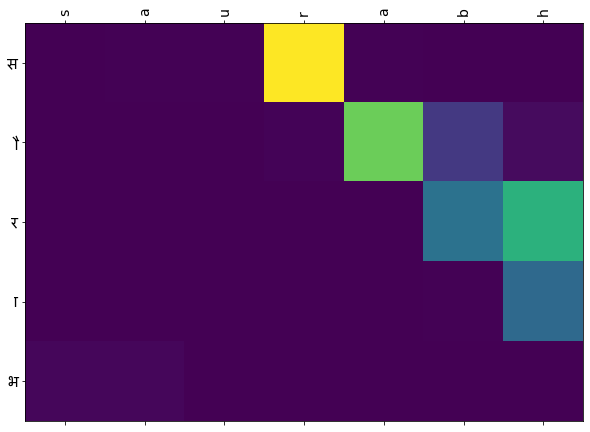

In [64]:
translate2("saurabh")

In [66]:
accuracy=calculate_Sample_Word_accuracy(train_input_texts,train_target_texts,100)
accuracy

In [67]:
accuracy

70.0

In [79]:

def calculate_Test_wordAccuracy(input_text,target_text):
    start = time.time()
    predicted_words=[]
    count=0
    for (i,sentence) in enumerate(input_text):
        print(sentence)
        result = translate(sentence)
        predicted_words.append(result)
        print("Actual translation",target_text[i])
        print("Predicted translation",result)
        if result==target_text[i]:
            count+=1
    print('Word Accuracy = : {}'.format(count*100.0/len(input_text)))
    print('Time taken for 1calculating word accuracy {} sec\n'.format(time.time() - start))
    (pd.DataFrame({'English Word': input_text, 'True Transliteration': target_text, 'Predicted Transliteration': predicted_words})
   .to_csv('results_attn.csv', index=False))
    return count*100.0/len(input_text)


In [80]:
acc=calculate_Test_wordAccuracy(test_input_texts,test_target_texts)
acc

Streaming output truncated to the last 5000 lines.
Actual translation बीफ
Predicted translation बीफ
beem
Actual translation बीम
Predicted translation बीम
bim
Actual translation बीम
Predicted translation बीम
beemon
Actual translation बीमों
Predicted translation बीमों
bimon
Actual translation बीमों
Predicted translation बीमों
beerganj
Actual translation बीरगंज
Predicted translation बीरगंज
birganj
Actual translation बीरगंज
Predicted translation बर्गंज
beesavaan
Actual translation बीसवां
Predicted translation बीसवान
bisavan
Actual translation बीसवां
Predicted translation बिसवन
bisawan
Actual translation बीसवां
Predicted translation बिसवन
beast
Actual translation बीस्ट
Predicted translation बीअस्ट
budvig
Actual translation बुडविग
Predicted translation बुद्विग
budwig
Actual translation बुडविग
Predicted translation बुड़विग
bull
Actual translation बुल
Predicted translation बुल
bulaao
Actual translation बुलाओ
Predicted translation बुलाओ
bulao
Actual translation बुलाओ
Predicted translation बुलाओ

38.116392714349175

In [73]:
class CharVal(object):
    def __init__(self, char, val):
        self.char = char
        self.val = val

    def __str__(self):
        return self.char

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb
def color_charvals(s):
    r = 255-int(s.val*255)
    color = rgb_to_hex((255, r, r))
    return 'background-color: %s' % color

# if you are using batches the outputs will be in batches
# get exact attentions of chars
an_attention_output = attention_weights[0][-21:]

# before the prediction i supposed you tokenized text
# you need to match each char and attention
char_vals = [CharVal(c, v) for c, v in zip(train_target_texts[1:10], an_attention_output)]
import pandas as pd
char_df = pd.DataFrame(char_vals).transpose()
# apply coloring values
char_df = char_df.style.applymap(color_charvals)
char_df

,0,1,2,3,4,5,6,7,8
0,अंकगणित,अंकल,अंकुर,अंकुरण,अंकुरित,अंकुश,अंकुश,अंग,अंग
